In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiqpq5ExFkDfzzvYx3l6fwqvPKrCgV05I9VIfa7lw3yH4b0Wc2E39U
Mounted at /content/drive


In [2]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 117kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Introduction:
Wholesale Customer dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. Number of Instances: 440 Number of Attributes: 8 Data Set Characteristics: Multivariate Attribute Characteristics: Integer

Objective:
The major aim is to perform clustering analysis using algorithms like hClust,PAM,kMeans,mclust and provide inferences accordingly.

Attribute Information:

FRESH: annual spending (m.u.) on fresh products (Continuous)
MILK: annual spending (m.u.) on milk products (Continuous)
GROCERY: annual spending (m.u.)on grocery products (Continuous)
FROZEN: annual spending (m.u.)on frozen products (Continuous)
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
CHANNEL: customersale Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
REGION: customersale Region - Lisnon, Oporto or Other (Nominal)

In [3]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [7]:
from google.colab import files
uploaded = files.upload()

Saving clusteringDataSet33.csv to clusteringDataSet33.csv


In [8]:
#  read the CSV file and look at the first five rows of the data:
dataset = pd.read_csv('clusteringDataSet33.csv')
dataset.head()

,meanfreq,sd,median,IQR,skew,kurt,mode,centroid,dfrange
0,0.059781,0.064241,0.032027,0.075122,12.863462,274.402906,0.000000,0.059781,0.000000
1,0.066009,0.067310,0.040229,0.073252,22.423285,634.613855,0.000000,0.066009,0.046875
2,0.077316,NaN,0.036718,0.123207,30.757155,1024.927705,0.000000,0.077316,0.007812
3,0.151228,0.072111,0.158011,0.111374,1.232831,4.177296,0.083878,0.151228,0.554688
4,0.135120,0.079146,0.124656,0.127325,1.101174,4.333713,0.104261,0.135120,5.476562


In [ ]:
print(dataset)

     Gender  Glucose       BP  ...   BMI  PedigreeFunction  Age
0      Male      148  72.0000  ...  33.6             0.627   50
1    Female       85  66.0000  ...  26.6             0.351   31
2    Female      183  64.0000  ...  23.3             0.672   32
3    Female       89  66.0000  ...  28.1             0.167   21
4      Male      137  20.6184  ...  43.1             2.288   33
..      ...      ...      ...  ...   ...               ...  ...
559    Male       85  74.0000  ...  30.1             0.300   35
560    Male      125  76.0000  ...  33.8             0.121   54
561    Male      198  66.0000  ...  41.3             0.502   28
562    Male       87  68.0000  ...  37.6             0.401   24
563    Male       99  60.0000  ...  26.9             0.497   32

[564 rows x 8 columns]


In [9]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(628, 9)


In [10]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  628 non-null    float64
 1   sd        617 non-null    float64
 2   median    620 non-null    float64
 3   IQR       617 non-null    float64
 4   skew      615 non-null    float64
 5   kurt      617 non-null    float64
 6   mode      624 non-null    float64
 7   centroid  623 non-null    float64
 8   dfrange   628 non-null    float64
dtypes: float64(9)
memory usage: 44.3 KB


In [11]:
types = dataset.dtypes
print(types)

meanfreq    float64
sd          float64
median      float64
IQR         float64
skew        float64
kurt        float64
mode        float64
centroid    float64
dfrange     float64
dtype: object


In [13]:
#Count total number of classes in Data
class_counts = dataset.groupby('skew').size()
print(class_counts)

skew
0.529584     1
0.693730     1
0.885702     1
0.945953     1
0.979442     1
            ..
28.450250    1
29.350741    1
29.969000    1
30.757155    1
33.167300    1
Length: 615, dtype: int64


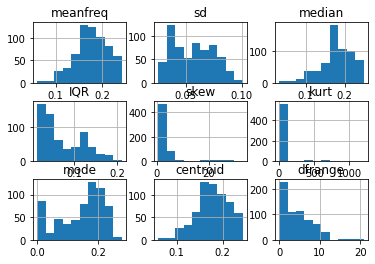

In [14]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

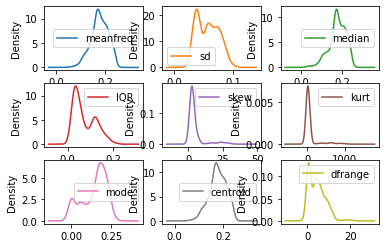

In [15]:
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [16]:
dataset.isnull().sum()

meanfreq     0
sd          11
median       8
IQR         11
skew        13
kurt        11
mode         4
centroid     5
dfrange      0
dtype: int64

In [17]:
mean_a=dataset.mean()
mean_a=np.round(mean_a,4)
mean_a

meanfreq     0.1774
sd           0.0565
median       0.1784
IQR          0.0734
skew         4.5074
kurt        68.8634
mode         0.1455
centroid     0.1775
dfrange      4.3885
dtype: float64

In [18]:
# Extracting features of dataset

X = dataset.iloc[:,2:8].values
X

array([[3.20269130e-02, 7.51219510e-02, 1.28634618e+01, 2.74402906e+02,
        0.00000000e+00, 5.97809850e-02],
       [4.02287350e-02, 7.32523230e-02, 2.24232854e+01, 6.34613855e+02,
        0.00000000e+00, 6.60087400e-02],
       [3.67184590e-02, 1.23206961e-01, 3.07571546e+01, 1.02492771e+03,
        0.00000000e+00, 7.73155030e-02],
       ...,
       [1.83731237e-01, 1.90936383e-01, 1.87650163e+00, 6.60450859e+00,
        8.00571800e-03, 1.42056256e-01],
       [1.84976168e-01, 1.76434700e-01, 1.59106489e+00, 5.38829754e+00,
        2.12202097e-01, 1.43658745e-01],
       [1.83043922e-01, 1.80755873e-01, 1.70502912e+00, 5.76911537e+00,
        2.67701736e-01, 1.65508946e-01]])

In [20]:
dataset['meanfreq'].fillna(mean_a[2],inplace=True)
dataset['sd'].fillna(mean_a[3],inplace=True)
dataset['median'].fillna(mean_a[4],inplace=True)
dataset['IQR'].fillna(mean_a[5],inplace=True)
dataset['kurt'].fillna(mean_a[6],inplace=True)
dataset.isnull().sum()

meanfreq     0
sd           0
median       0
IQR          0
skew        13
kurt         0
mode         4
centroid     5
dfrange      0
dtype: int64

In [21]:
print(X)


[[3.20269130e-02 7.51219510e-02 1.28634618e+01 2.74402906e+02
  0.00000000e+00 5.97809850e-02]
 [4.02287350e-02 7.32523230e-02 2.24232854e+01 6.34613855e+02
  0.00000000e+00 6.60087400e-02]
 [3.67184590e-02 1.23206961e-01 3.07571546e+01 1.02492771e+03
  0.00000000e+00 7.73155030e-02]
 ...
 [1.83731237e-01 1.90936383e-01 1.87650163e+00 6.60450859e+00
  8.00571800e-03 1.42056256e-01]
 [1.84976168e-01 1.76434700e-01 1.59106489e+00 5.38829754e+00
  2.12202097e-01 1.43658745e-01]
 [1.83043922e-01 1.80755873e-01 1.70502912e+00 5.76911537e+00
  2.67701736e-01 1.65508946e-01]]


In [22]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# statistics of scaled data
pd.DataFrame(X).describe()

,0,1,2,3,4,5
count,6.280000e+02,6.280000e+02,6.150000e+02,6.280000e+02,6.240000e+02,6.230000e+02
mean,2.318121e-17,8.313414e-17,2.942542e-17,1.104919e-16,-1.081756e-16,1.312487e-16
std,1.000797e+00,1.000797e+00,1.000814e+00,1.000797e+00,1.000802e+00,1.000804e+00
min,-4.136183e-01,-1.400447e-01,-7.001719e-01,-3.727732e-01,-1.916296e+00,-3.396919e+00
25%,-1.470024e-01,-1.380634e-01,-4.393180e-01,-3.322869e-01,-7.309876e-01,-5.309565e-01
50%,-1.116014e-01,-1.355270e-01,-3.159645e-01,-3.094569e-01,2.897905e-01,-1.300398e-02
75%,-4.837975e-02,-1.287080e-01,-1.334998e-01,-2.446744e-01,7.657016e-01,7.902895e-01
max,8.774052e+00,7.489284e+00,5.044670e+00,6.266925e+00,1.751342e+00,1.903097e+00


In [24]:
# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataset["skew"] = labelencoder_X.fit_transform(dataset["skew"])

In [29]:
dataset["skew"]

0      567
1      585
2      613
3       19
4        8
      ... 
623     98
624      1
625    118
626     61
627     87
Name: skew, Length: 628, dtype: int64

In [32]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [37]:
dataset.isnull().sum()

meanfreq    0
sd          0
median      0
IQR         0
skew        0
kurt        0
mode        4
centroid    5
dfrange     0
dtype: int64